# Overview of time-domain analyses

Following the video [https://mikexcohen.com/lecturelets/timedomain/timedomain.html](http://mikexcohen.com/lecturelets/timedomain/timedomain.html)

First we import the libraries we'll need later on. Note that we moved the utility functions introduced in `01-indexing.ipynb` to a dedicated module named `utils.py`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils import istring_idx, import_eeg_mat

In [2]:
eeg = import_eeg_mat('../data/sampleEEGdata.mat')

## Random trials

The first plot shown in the video: plot random trials for a fixed channel

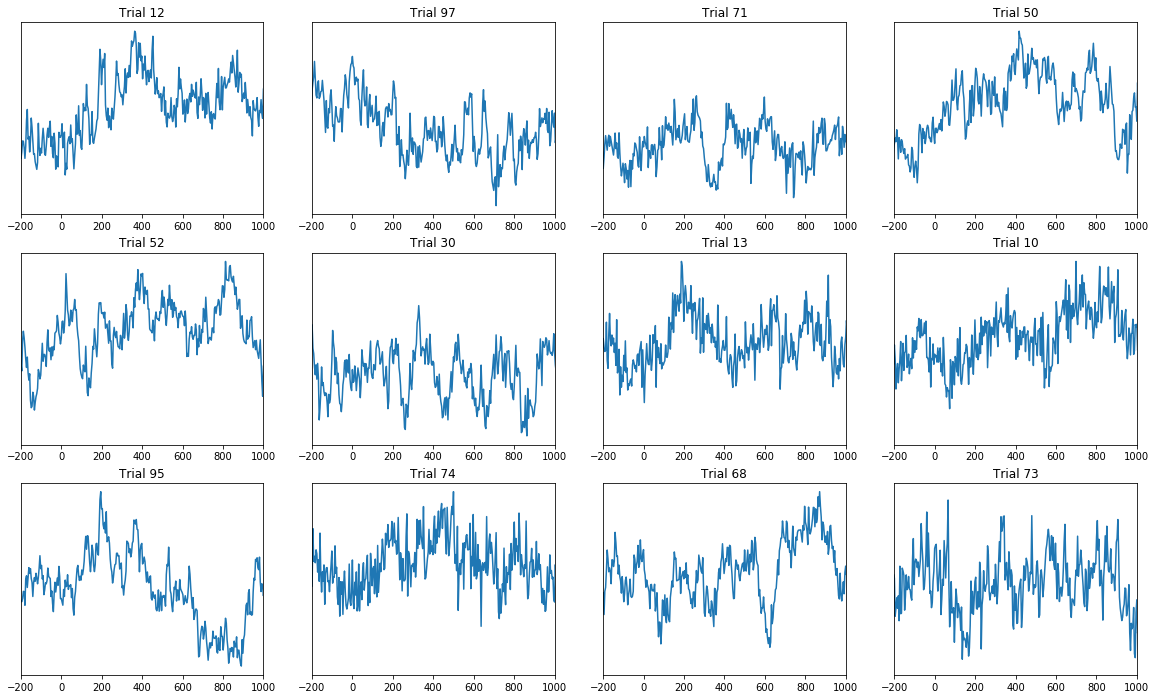

In [3]:
# The channel we'll plot
channel_to_plot = "fcz"
# The number of random trials we'll plot
ntrials = 12

# Define x limits
xlim = (-200, 1000)
# Find index of target channel in the array of channels
channel_index = istring_idx(eeg.chanlabels, channel_to_plot)

# Compute the number of rows and columns to fit ntrials
ncols = np.ceil(np.sqrt(ntrials)).astype(int)
nrows = np.ceil(ntrials / ncols).astype(int)

# Plot each trial, randomly sampling ntrials trials
fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
for i, trial in enumerate(np.random.choice(range(eeg.trials), size=ntrials, replace=False)):
    ax = axes.flat[i]
    ax.plot(eeg.times, eeg.data[channel_index, :, trial])
    ax.set_xlim(xlim)
    ax.set_yticks([])
    ax.set_title("Trial {}".format(trial))

## ERP

The second plot show in the video: plot all trials as well as ERP

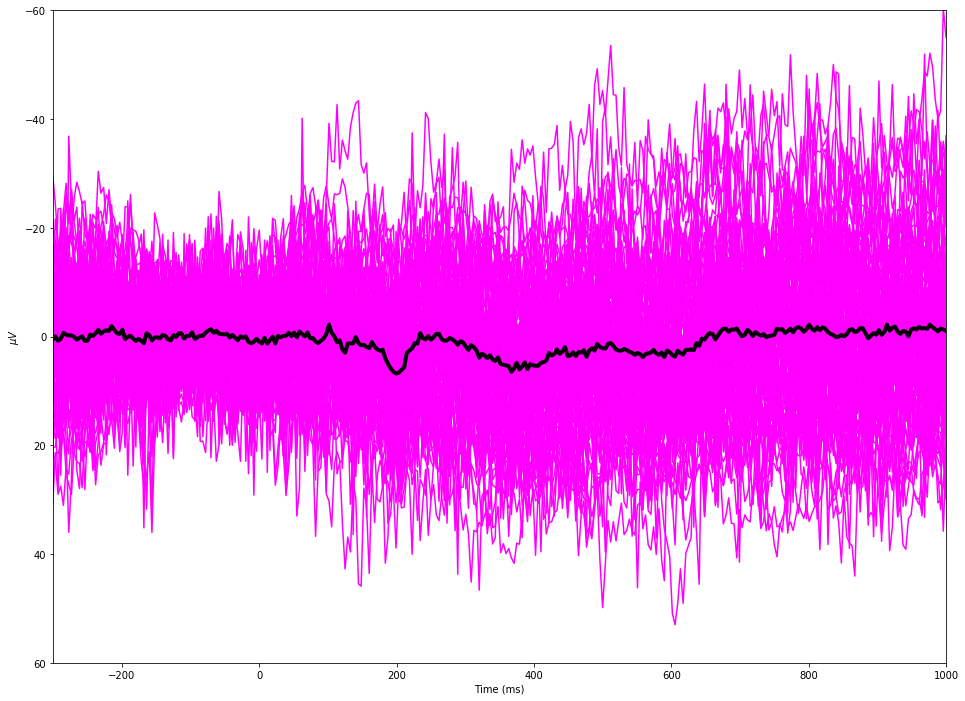

In [4]:
fig, ax = plt.subplots(figsize=(16, 12))

# Plot all trials
ax.plot(eeg.times, eeg.data[channel_index, :, :], color='magenta')
# Plot the ERP
erp = eeg.data[channel_index, :, :].mean(-1)
ax.plot(eeg.times, erp, color='black', lw=4)

# Set figure limits, labels, and orientation
ax.set_xlim(-300, 1000)
ax.set_ylim(-60, 60)
ax.invert_yaxis()
ax.set_xlabel('Time (ms)')
ax.set_ylabel(r'$\mu V$');

## ERP with fancy lines

The same ERP with some plotting candy such as lines and a change of x tick label

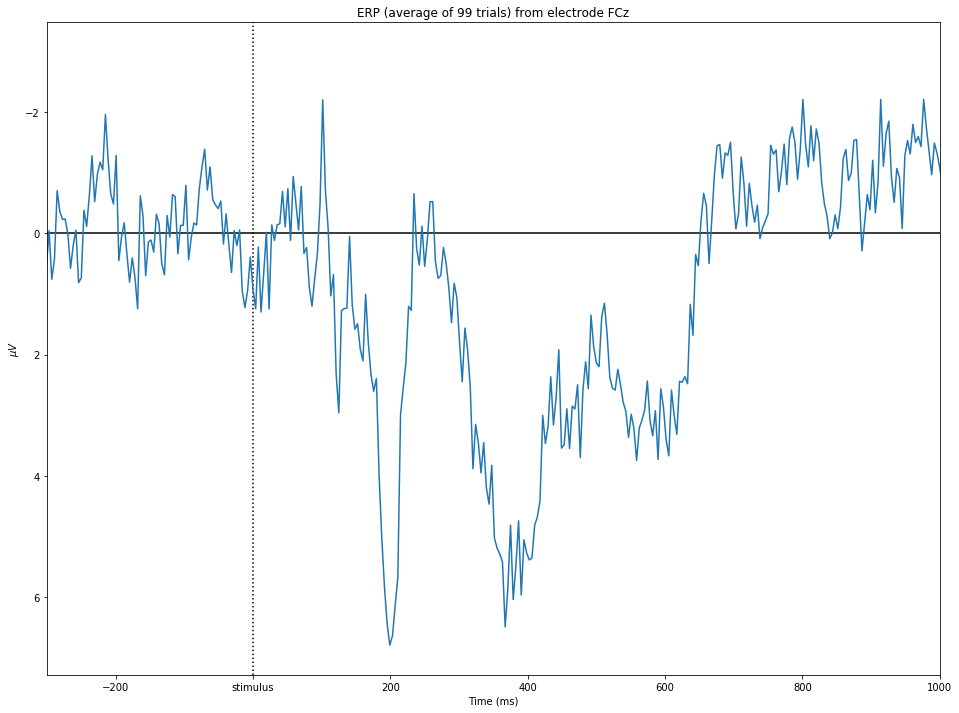

In [5]:
fig, ax = plt.subplots(figsize=(16, 12))

ax.plot(eeg.times, erp)
ax.set_xlim(-300, 1000)
ax.invert_yaxis()

_xlim = ax.get_xlim()
ax.hlines(0, *_xlim)
ax.set_xlim(_xlim)
_ylim = ax.get_ylim()
ax.vlines(0, *_ylim, ls='dotted')
ax.set_ylim(_ylim)

ax.set_xlabel('Time (ms)')
ax.set_ylabel(r'$\mu V$')
ax.set_title('ERP (average of {} trials) from electrode {}'.format(eeg.trials, eeg.chanlabels[channel_index]))

# Draw the canvas to have positions and text for the ticks
fig.canvas.draw()
# Then change the label for tick at time 0
xticks = ax.get_xticks()
xticklabels = [t.get_text() for t in ax.get_xticklabels()]
xticklabels[np.where(xticks == 0)[0].item()] = 'stimulus'
ax.set_xticklabels(xticklabels);

## Butterfly and topographical variance plots

Final plot shown in the video

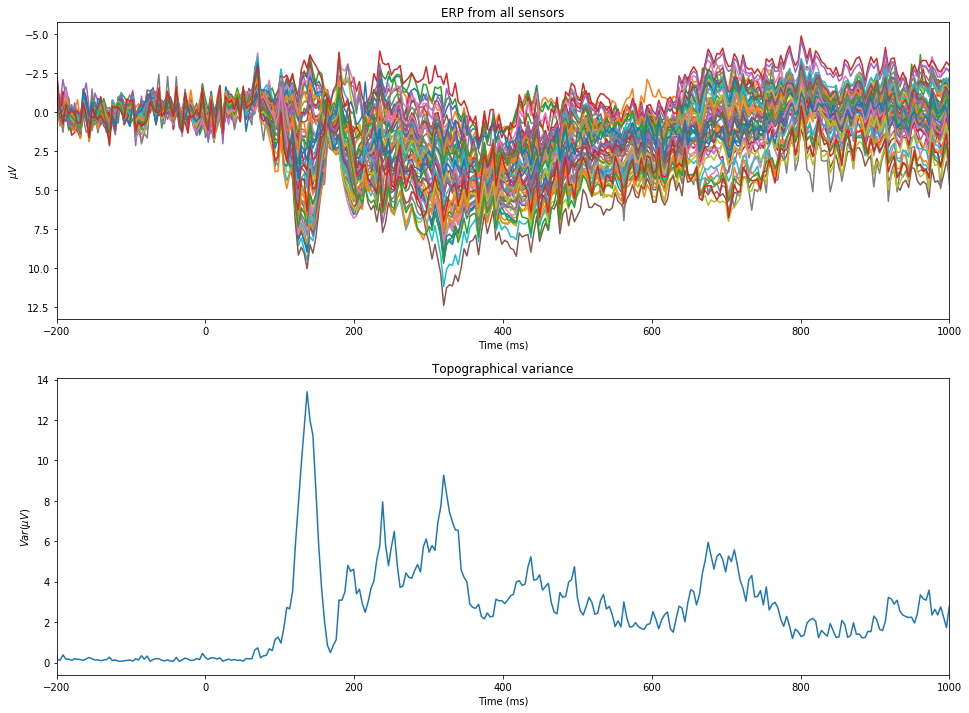

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Butterfly plot
ax1.plot(eeg.times, eeg.data.mean(-1).T)
ax1.set_xlim(-200, 1000)
ax1.invert_yaxis()
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel(r'$\mu V$')
ax1.set_title('ERP from all sensors')

# Topographical variance
ax2.plot(eeg.times, eeg.data.mean(-1).var(0))
ax2.set_xlim(-200, 1000)
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel(r'$Var (\mu V)$')
ax2.set_title('Topographical variance');